In [99]:
import numpy as np
import matplotlib.pyplot as plt


In [100]:
# the specifications are for jupyter earth system
R_planet = 70000
R_star = 695842
angle = np.pi/2
P = 1
a = 778000000

In [101]:
delta = (R_planet/R_star)**2
transit_t = (P/np.pi)*np.arcsin((((R_star + R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))
transit_f = (P/np.pi)*np.arcsin((((R_star - R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))
b = a*np.cos(angle)

In [102]:
def linear(a,b,c,d,t):
    y = b + ((d-b)/(c-a)*(t-a))
    return y

In [103]:
t=[]
t = np.arange(0.499*P,0.501*P,(transit_t - transit_f)/20)
y =[]

for i in range (0,len(t),1):
    if (t[i] <= 0.5*P or t[i] > (0.5*P + transit_t)) :
        y.append(1)
    elif (t[i]>0.5*P and t[i] <= (0.5*P + (transit_t - transit_f)/2)):
            y.append(linear(0.5*P,1,0.5*P+(transit_t - transit_f)/2,1-delta,t[i]))
    elif  (t[i]>(0.5*P + (transit_t + transit_f)/2) and t[i] <=(0.5*P + transit_t)):
            y.append(linear(0.5*P+(transit_t + transit_f)/2,1-delta,0.5*P+transit_t,1,t[i]))
    else :
            y.append(1 - delta)                 

        

Text(0, 0.5, 'relative_intensity')

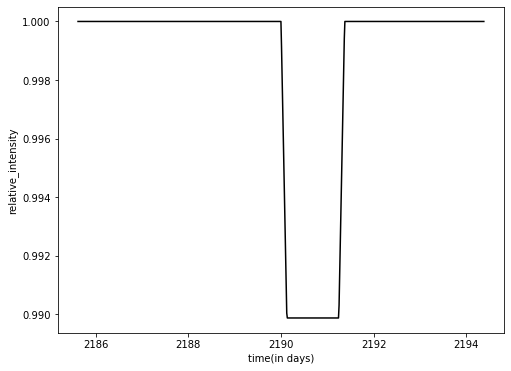

In [104]:
plt.figure(figsize=(8,6))
plt.plot(t*12*365,y,'k')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

In [105]:
alpha = transit_f*np.pi/P
print(alpha)


0.0008044242512813566


In [106]:
# correction for limb darkening
# finding angle 
def param(time):
    r = ((a*np.sin(angle)*np.sin(alpha-(2*alpha*time/transit_f)))**2 + (a*np.cos(angle))**2)**0.5
    mu = (1-(r/(R_star))**2)**0.5
   
    return mu


In [107]:
#Here I means relative intensity 
#linear model

def lin(mu):
    u = 0.3
    return  1- u*(1-mu)

#quadratic law

def quad(mu):
    u1 = 0.1
    u2 = 0.2
    return  1- u1*(1-mu) -u2*(1-mu)**2
#non-linear law
def nonlinear(mu):
    u1 = 0.05
    u2 = 0.05
    u3 = 0.15
    u4 = 0.05
    return  1-u1*(1-mu**0.5) -u2*(1-mu)-u3*(1 -mu**1.5)-u4*(1 - mu**2)

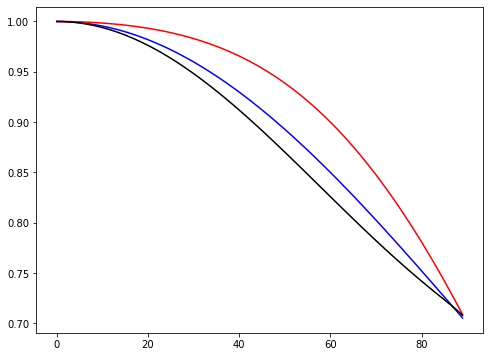

In [108]:
#luminosity vs angle

rads = np.arange(0,90,1)
z1 = []
z2 = []
z3 = []
for i in range (0,len(rads),1):
    z1.append(lin(np.cos(rads[i]*np.pi/180)))
    z2.append(quad(np.cos(rads[i]*np.pi/180)))
    z3.append(nonlinear(np.cos(rads[i]*np.pi/180)))

plt.figure(figsize=(8,6))
plt.plot(rads,z1,'b')
plt.plot(rads,z2,'r')
plt.plot(rads,z3,'k')

In [109]:
I_avg = 1       #since we are plotting relative intensity w.r.t to avg_intesity of star we need to find I_avg (without planet)

I_center = 1/0.9  #this is assumed not calculated 

mu2 = param(0)
I2 = lin(mu2)
delta2 = I2*delta/0.9
print(delta2)

0.009345544872852473


In [110]:
def area(x):
    alpha = np.arccos((R_planet-x)/R_planet)
    A = alpha*R_planet**2 - R_planet*np.sin(alpha)*(R_planet-x)
    return A




def ingress_I(t1,t2,y):
    
    x = 4*R_planet/(transit_t - transit_f)*(t2-t1)
    if y==1:
        A = area(x)
    else :
        A = area(2*R_planet-x)
        
    s =  delta3*A/(np.pi*R_planet**2)
    return s

In [111]:



#plotting light curve
#assuming R_planet << R_star
tim = []
tim = np.arange(0.5*P-transit_t,0.5*P+2*transit_t,(transit_t-transit_f)/100)
intensity_l= []
intensity_q = []
intensity_nl = []
j = 0 
for k in range (0,len(tim),1):
    if tim[k] <= 0.5*P  :
        intensity_l.append(1)
        intensity_q.append(1)
        intensity_nl.append(1)
        j=j+1
    
   
        
        
    elif tim[k] > 0.5*P + transit_t:
        intensity_l.append(1)
        intensity_q.append(1)
        intensity_nl.append(1)
        
        
    elif (tim[k]>0.5*P and tim[k] <= (0.5*P + (transit_t - transit_f)/2)):
        t
        intensity_l.append(0)
        intensity_q.append(0)
        intensity_nl.append(0)
        tim_e = tim[k]
        
    elif (tim[k] > (0.5*P + (transit_t - transit_f)/2) and (tim[k]<=(0.5*P + (transit_t + transit_f)/2))):
        mu =param(tim[k] - tim_e)
        I_l = lin(mu)                                    # here I is intensity with respect to max intensity i.e at center
        I_q = quad(mu)
        I_nl = nonlinear(mu)
        
        
        delta_l = I_l*delta/0.9                      # I_avg is average intensity /max_intensity i.e (I_center)
        delta_q = I_q*delta/0.9
        delta_nl= I_nl*delta/0.9
        
        intensity_l.append(1-delta_l) 
        intensity_q.append(1-delta_q)
        intensity_nl.append(1-delta_nl)
        tim_exit = tim[k]
        
    elif  (tim[k]>(0.5*P + (transit_t + transit_f)/2) and tim[k] <=(0.5*P + transit_t)):
        
        
        
        
        intensity_l.append(0)
        intensity_q.append(0)
        intensity_nl.append(0)
       
    
    
l =np.asarray(intensity_l)
tim =tim[l != 0 ]
while 0 in intensity_l:
    intensity_l.remove(0)
while 0 in intensity_q:
    intensity_q.remove(0)
while 0 in intensity_nl:
    intensity_nl.remove(0)
    

Text(0, 0.5, 'relative_intensity')

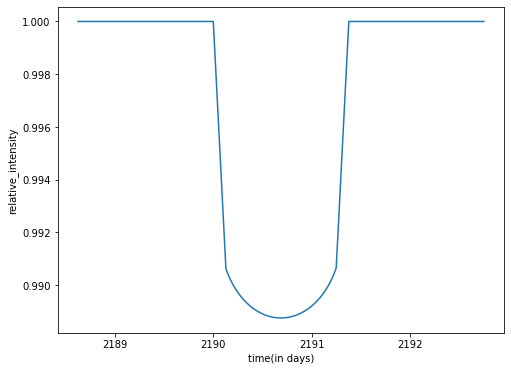

In [112]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_l)



plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

Text(0, 0.5, 'relative_intensity')

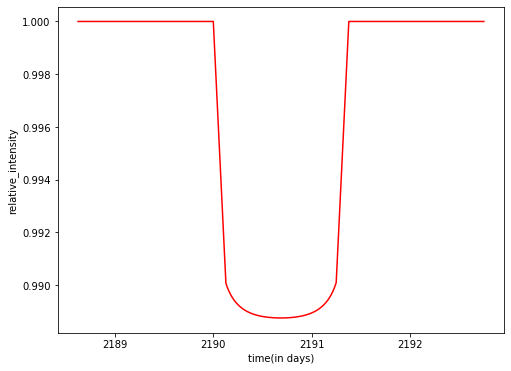

In [113]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_q,'r')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

Text(0, 0.5, 'relative_intensity')

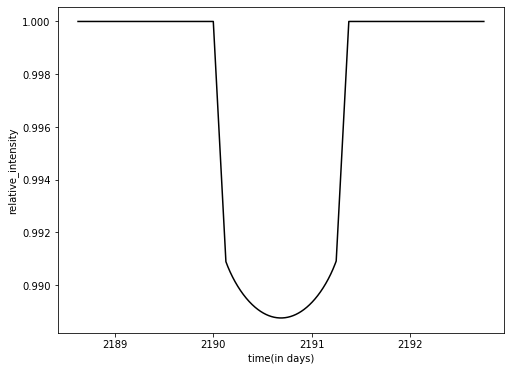

In [114]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_nl,'k')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

In [115]:
# ok now lets introduce planet luminosity
r_coeff = 1
L_planet  = r_coeff*I_avg/4*(R_planet/a)**2

print(L_planet)

2.0238433528723704e-09


In [116]:
#including planet lminosity
Temp_star = 5700
Temp_planet = 140        # these values are of sun and jupyter

#intensity by planet is calculated by stefan boltzmann law
#the ratio of intensity of star to that of planet is proportional to ratio of respective temperature at longer wavelengths
#assuming planet and star act as black body

I_planet = (Temp_planet/Temp_star)   #I_planet w.r.t to star


delta_occ  = (L_planet+I_planet)*(R_planet/R_star)**2
print(delta_occ)

0.0002485581561951918


In [117]:
mu3 = param(0)
I3 = lin(mu3)
delta3 = (I3-I_planet)*delta/0.9

In [118]:
def area(x):
    alpha = np.arccos((R_planet-x)/R_planet)
    A = alpha*R_planet**2 - R_planet*np.sin(alpha)*(R_planet-x)
    return A




def ingress_I(t1,t2,y):
    
    x = 4*R_planet/(transit_t - transit_f)*(t2-t1)
    if y==1:
        A = area(x)
    else :
        A = area(2*R_planet-x)
        
    s =  delta3*A/(np.pi*R_planet**2)
    return s

In [123]:

#plotting light curve
tim1 = []
tim1 = np.arange(0.25*P,0.25*P+transit_t,(transit_t-transit_f)/30)
intensity_l1= []

z = 0 
for k in range (0,len(tim1),1):
    if tim1[k] <= 0.25*P  :
        intensity_l1.append(1)
        z=z+1

    elif (tim1[k]>0.25*P and tim1[k] <= (0.25*P + (transit_t - transit_f)/2)):
        r= ingress_I(tim1[z],tim1[k],1)
        intensity_l1.append(1-r)
        tim_ing = tim1[k]
        
    
    
    elif (tim1[k] > (0.25*P + (transit_t - transit_f)/2) and (tim1[k]<=(0.25*P + (transit_t + transit_f)/2))):
        mu =param(tim1[k]  - tim_ing)
        I_l = lin(mu) 
        delta_l = (I_l-I_planet)*delta*I_center/I_avg           # I_avg is average intensity /max_intensity i.e (I_center)
        intensity_l1.append(1-delta_l)
        tim_ex = tim1[k]
        print(delta_l)
    
        
    elif  (tim1[k]>(0.25*P + (transit_t + transit_f)/2) and tim1[k] <=(0.25*P + transit_t)):
        s = ingress_I(tim_ex,tim1[k],0)
        intensity_l1.append(1-s)
        
    elif  tim1[k] >= 0.75*P and tim1[k]<(0.75*P + transit_t):
        intensity_l1.append((1-delta_occ))   
        
        
    elif  (tim1[k] >= (0.25*P + transit_t) and tim1[k] < 0.75*P ) or tim1[k] >= 0.75*P + transit_t:
        intensity_l1.append(1)
    


0.00915904427587257
0.009242608029637561
0.009320948234407326
0.009394747074731194
0.009464542380860488
0.009530767213438292
0.009593776472226454
0.009653865381311045
0.009711282693349128
0.009766240349193935
0.009818920692004752
0.009869481953307918
0.009918062492081705
0.00996478411713653
0.010009754724330201
0.010053070414006918
0.010094817208801041
0.010135072460415076
0.010173906011634665
0.010211381163761041
0.010247555487903867
0.010282481509900136
0.010316207292133136
0.01034877693061572
0.01038023098195063
0.010410606831887218
0.010439939014942418
0.010468259492787381
0.010495597897704823
0.010521981746309911
0.010547436627836035
0.010571986370567181
0.010595653189414743
0.010618457817159581
0.010640419621488758
0.010661556709633369
0.010681886022146026
0.010701423417133484
0.010720183746073133
0.010738180922185286
0.010755427982200758
0.010771937142251116
0.010787719848513655
0.010802786823161806
0.010817148106101989
0.010830813092918055
0.010843790569392895
0.010856088742932

Text(0, 0.5, 'relative_intensity')

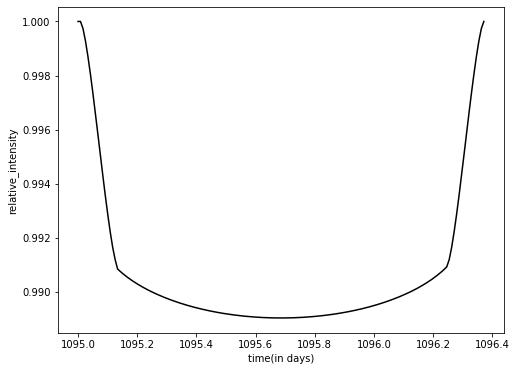

In [124]:
plt.figure(figsize=(8,6))
plt.plot(tim1*365*12,intensity_l1,'k')

plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')